/var/folders/h4/kdky5skx0jggltns31j4zj7r0000gn/T/ipykernel_17961/4034888720.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  return (g2(x, y), (x-2)/(-2*(x-1)) - (y-3)/1)  # ∇f = λ∇g2
/var/folders/h4/kdky5skx0jggltns31j4zj7r0000gn/T/ipykernel_17961/4034888720.py:38: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x3, y3 = fsolve(equations3, (1, 0))  # Tangent point with g2


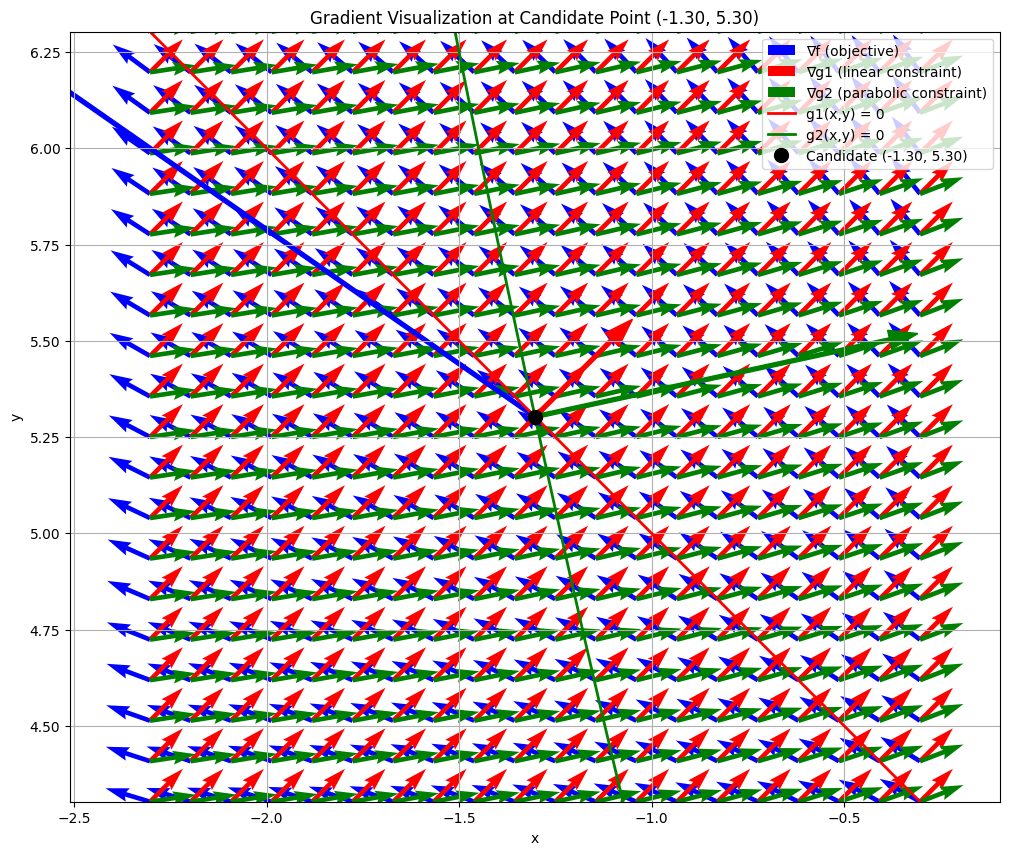

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the functions and their gradients
def f(x, y):
    return (x - 2)**2 + (y - 3)**2  # Objective function

def grad_f(x, y):
    return np.array([2*(x - 2), 2*(y - 3)])  # ∇f

def g1(x, y):
    return x + y - 4  # Linear constraint

def grad_g1(x, y):
    return np.array([1, 1])  # ∇g1 (constant)

def g2(x, y):
    return y - (x - 1)**2  # Parabolic constraint

def grad_g2(x, y):
    return np.array([-2*(x - 1), 1])  # ∇g2

# Find candidate solutions
def equations1(p):
    x, y = p
    return (g1(x, y), g2(x, y))
x1, y1 = fsolve(equations1, (0, 4))  # Intersection point

def equations2(p):
    x, y = p
    return (g1(x, y), (x-2)/1 - (y-3)/1)  # ∇f = λ∇g1
x2, y2 = fsolve(equations2, (2, 2))  # Tangent point with g1

def equations3(p):
    x, y = p
    return (g2(x, y), (x-2)/(-2*(x-1)) - (y-3)/1)  # ∇f = λ∇g2
x3, y3 = fsolve(equations3, (1, 0))  # Tangent point with g2

# Select which candidate to zoom on (change this to x2,y2 or x3,y3)
zoom_point = x1, y1
zoom_size = 1.0  # Size of zoomed area

# Create zoomed grid
x_zoom = np.linspace(zoom_point[0] - zoom_size, zoom_point[0] + zoom_size, 20)
y_zoom = np.linspace(zoom_point[1] - zoom_size, zoom_point[1] + zoom_size, 20)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

# Calculate gradients at grid points
grad_f_x = 2*(X_zoom - 2)
grad_f_y = 2*(Y_zoom - 3)
grad_g1_x = np.ones_like(X_zoom)
grad_g1_y = np.ones_like(Y_zoom)
grad_g2_x = -2*(X_zoom - 1)
grad_g2_y = np.ones_like(Y_zoom)

# Normalize gradients for better visualization
def normalize(u, v):
    norm = np.sqrt(u**2 + v**2)
    return u/norm, v/norm

grad_f_x_norm, grad_f_y_norm = normalize(grad_f_x, grad_f_y)
grad_g1_x_norm, grad_g1_y_norm = normalize(grad_g1_x, grad_g1_y)
grad_g2_x_norm, grad_g2_y_norm = normalize(grad_g2_x, grad_g2_y)

# Plot setup
plt.figure(figsize=(12, 10))

# Plot gradients
plt.quiver(X_zoom, Y_zoom, grad_f_x_norm, grad_f_y_norm, color='blue', 
           scale=20, width=0.005, label='∇f (objective)')
plt.quiver(X_zoom, Y_zoom, grad_g1_x_norm, grad_g1_y_norm, color='red', 
           scale=20, width=0.005, label='∇g1 (linear constraint)')
plt.quiver(X_zoom, Y_zoom, grad_g2_x_norm, grad_g2_y_norm, color='green', 
           scale=20, width=0.005, label='∇g2 (parabolic constraint)')

# Plot constraint lines at zoom level
x_vals = np.linspace(zoom_point[0] - zoom_size, zoom_point[0] + zoom_size, 100)
plt.plot(x_vals, 4 - x_vals, 'r-', linewidth=2, label='g1(x,y) = 0')
plt.plot(x_vals, (x_vals - 1)**2, 'g-', linewidth=2, label='g2(x,y) = 0')

# Mark the candidate point
plt.plot(zoom_point[0], zoom_point[1], 'ko', markersize=10, 
         label=f'Candidate ({zoom_point[0]:.2f}, {zoom_point[1]:.2f})')

# Draw the gradients at the candidate point
grad_scale = 0.2  # Scaling factor for gradient arrows
plt.arrow(zoom_point[0], zoom_point[1], 
          grad_scale*grad_f(zoom_point[0], zoom_point[1])[0], 
          grad_scale*grad_f(zoom_point[0], zoom_point[1])[1], 
          color='blue', width=0.01, head_width=0.05)
plt.arrow(zoom_point[0], zoom_point[1], 
          grad_scale*grad_g1(zoom_point[0], zoom_point[1])[0], 
          grad_scale*grad_g1(zoom_point[0], zoom_point[1])[1], 
          color='red', width=0.01, head_width=0.05)
plt.arrow(zoom_point[0], zoom_point[1], 
          grad_scale*grad_g2(zoom_point[0], zoom_point[1])[0], 
          grad_scale*grad_g2(zoom_point[0], zoom_point[1])[1], 
          color='green', width=0.01, head_width=0.05)

# Formatting
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Gradient Visualization at Candidate Point ({zoom_point[0]:.2f}, {zoom_point[1]:.2f})')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(zoom_point[0] - zoom_size, zoom_point[0] + zoom_size)
plt.ylim(zoom_point[1] - zoom_size, zoom_point[1] + zoom_size)
plt.show()